In [2]:
# Installing matplotlib
# pip install matplotlib - In CMD line
# !pip install matplotlib - In Jupyter cell
# OR
# %pip install matplotlib - In Jupyter cell

In [3]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import numpy as np
# np is the alias for numpy
import pandas as pd
# pd is the alias for pandas

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Loading Dataset
df = pd.read_csv('Bollywood_Movies_Dataset.csv')
# Print the Type of df
print(type(df))
# Show top 5 rows
df.head()  

<class 'pandas.core.frame.DataFrame'>


,Movie_Name,BO_Collection,Budget,Box_Office_Verdict
0,Pyaar Ka Punchnama 2,53.25,25.0,Hit
1,Shandaar,38.28,68.0,Flop
2,Singh is Bliing,74.87,92.0,Flop
3,Jazbaa,24.3,30.0,Flop
4,Talvar,24,22.0,Plus


In [12]:
df_budget = df.groupby('Box_Office_Verdict').mean().reset_index()
df_budget['Budget']=round(df_budget['Budget']) # Rounding Budget
df_budget

,Box_Office_Verdict,Budget
0,All Time Blockbuster,108.0
1,Average,38.0
2,Blockbuster,40.0
3,Disaster,68.0
4,Flop,34.0
5,Hit,45.0
6,Plus,20.0
7,Semi Hit,75.0
8,Super Hit,60.0


Plotting a normal bar plot of Box_Office_Verdict vs Budget

<BarContainer object of 9 artists>

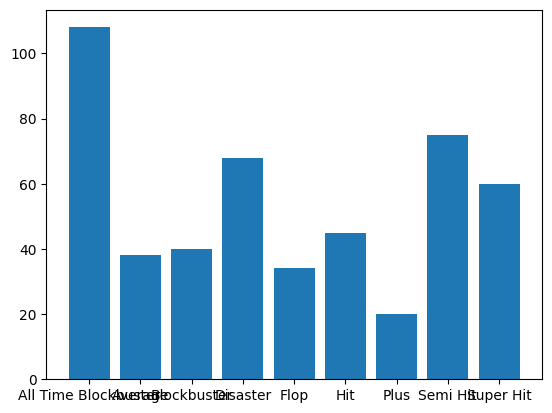

In [9]:
plt.bar(df_budget['Box_Office_Verdict'],df_budget['Budget'])

Adding xlim, ylim, figure, savefig, label, legend, xlabel, ylabel, title and show to the Plot

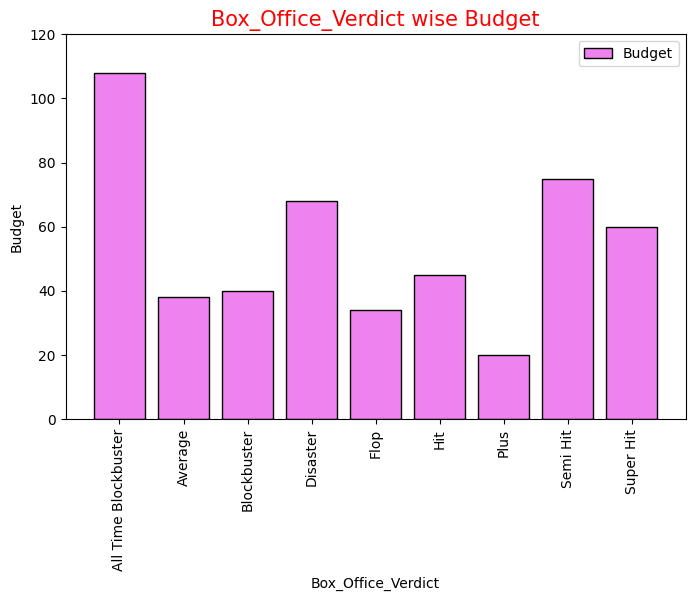

In [10]:
# Creating a bar plot and applying customization
plt.figure(figsize=(8,5)) # Setting figure size
plt.bar(df_budget['Box_Office_Verdict'],df_budget['Budget'],color='violet'
        ,edgecolor='black',label='Budget') # Customizing Bar with color, edgecolor, label
plt.title('Box_Office_Verdict wise Budget',fontsize=15,color='Red') # Setting title for the plot
plt.xlabel('Box_Office_Verdict') # Setting x-label
plt.ylabel('Budget') # Setting y-label
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
plt.ylim(0,120) # Setting limit of y-axis
plt.legend() # Slowing Legend for the plot
plt.savefig('BoxOfficeVerdict_vs_Budget.png') # Saving the plot
plt.show() # Showing the plot

Add color and edge color to the bars

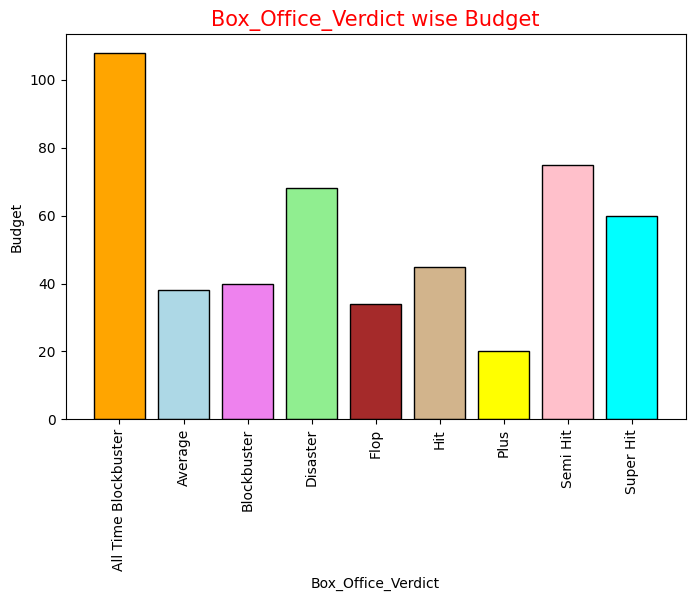

In [13]:
plt.figure(figsize=(8,5)) # Setting figure size
plt.bar(df_budget['Box_Office_Verdict'],df_budget['Budget'],
        color=['orange','lightblue','violet','lightgreen','brown','tan','yellow','pink','cyan'],
        edgecolor='black') # Customizing Bar with different color, edgecolor
# Setting title for the plot
plt.title('Box_Office_Verdict wise Budget',fontsize=15,color='Red')
plt.xlabel('Box_Office_Verdict') # Setting x-label
plt.ylabel('Budget') # Setting y-label
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
plt.show() # Showing the plot

Adding Text to the Plot

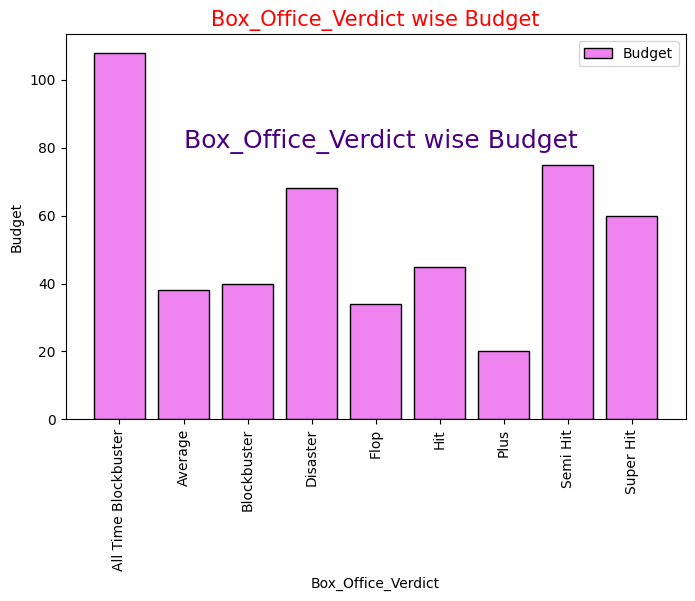

In [14]:
plt.figure(figsize=(8,5)) # Setting figure size
# Customizing Bar with different color, edgecolor and label
plt.bar(df_budget['Box_Office_Verdict'],df_budget['Budget'],color='violet',edgecolor='black',label='Budget')
# Adding text to the plot and setting position, text, color and fontsize for the text
plt.text(1,80,'Box_Office_Verdict wise Budget',color='indigo',fontsize=18)
# Setting title for the plot
plt.title('Box_Office_Verdict wise Budget',fontsize=15,color='Red')
plt.xlabel('Box_Office_Verdict') # Setting x-label
plt.ylabel('Budget') # Setting y-label
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
plt.legend() # Showing legend for the plot
plt.show() # Showing the plot

Adding Annotations to the Plot

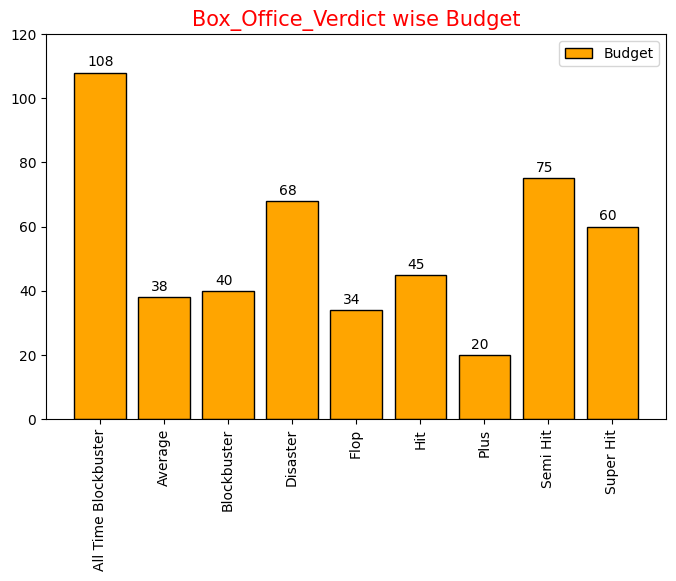

In [15]:
s = list(range(9))  # s = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(8,5)) # Setting figure size
# Customizing Bar with different color, edgecolor and label
plt.bar(s,df_budget['Budget'],color='orange',label='Budget',edgecolor='black')
plt.ylim(0,120) # Setting limit for y-axis
for idx,val in enumerate(df_budget['Budget']):  # generates additional counter (idx)
    plt.annotate(xy=[s[idx]-0.2,int(val)+2],text=int(val))
# Rotating x-labels by 90 degree
plt.xticks(s,df_budget['Box_Office_Verdict'],rotation=90) 
# Setting title for the plot
plt.title('Box_Office_Verdict wise Budget',fontsize=15,color='Red')
plt.legend() # Showing legend for the plot
plt.show() # Showing the plot

In [17]:
# Checking Data type of the dataframe
df.dtypes

Movie_Name             object
BO_Collection         float64
Budget                float64
Box_Office_Verdict     object
dtype: object

In [16]:
# Top 5 movies by BO_Collection , Using nlargest function of pandas
# Convert data type of BO_Collectio from object to float
df['BO_Collection'] = df['BO_Collection'].astype(float) 
df_top_movies=df.nlargest(n=5, columns=['BO_Collection'])
df_top_movies = df_top_movies.set_index('Movie_Name')
df_top_movies

,BO_Collection,Budget,Box_Office_Verdict
Movie_Name,,,
PK,330.83,90.0,All Time Blockbuster
Bajrangi Bhaijaan,318.14,125.0,All Time Blockbuster
Tanu Weds Manu,148.47,40.0,Blockbuster
Baahubali (Hindi),111.38,130.0,Hit
ABCD 2,105.01,60.0,Super Hit


Add xticks, yticks, alpha to the Plot

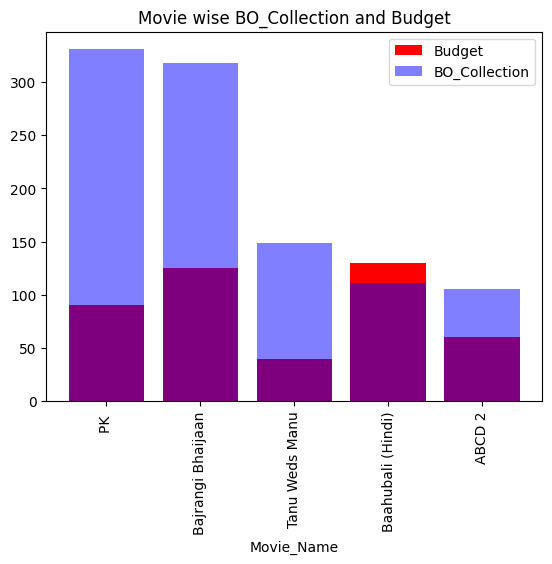

In [18]:
# Customizing first variable bars with color and label
plt.bar(df_top_movies.index,df_top_movies['Budget'],label='Budget',color='red')
# Customizing second variable bars with color, label and alpha
plt.bar(df_top_movies.index,df_top_movies['BO_Collection'],label='BO_Collection',color='blue',alpha=0.5)
plt.xlabel('Movie_Name') # setting x-lable
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
# Setting title for the plot
plt.title('Movie wise BO_Collection and Budget')
plt.legend() # Showing legend for the plot
plt.show() # Showing the plot

Plot Movie wise BO_Collection and Budget. Represent BO_Collection and Budget on 2 different axis

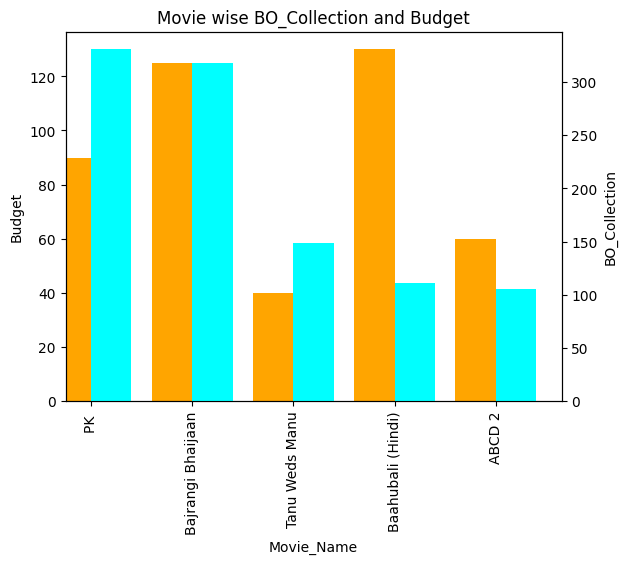

In [19]:
fig = plt.figure() # setting plt figure
ax = fig.add_subplot(111) # Setting plot axis
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4 # setting width 
# Customizing first variable bars with color, axis, width and position
df_top_movies['Budget'].plot(kind='bar', color='orange', ax=ax, width=width, position=1)
# Customizing second variable bars with color, axis, width and position
df_top_movies['BO_Collection'].plot(kind='bar', color='cyan', ax=ax2, width=width, position=0)
# Setting y-lable for first variable
ax.set_ylabel('Budget')
# Setting y-lable for second variable
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
ax2.set_ylabel('BO_Collection')
# Setting title for the plot
plt.title('Movie wise BO_Collection and Budget')
plt.show() # Showing the plot

Creating a simple line plot of Box_Office_Verdict vs Budget

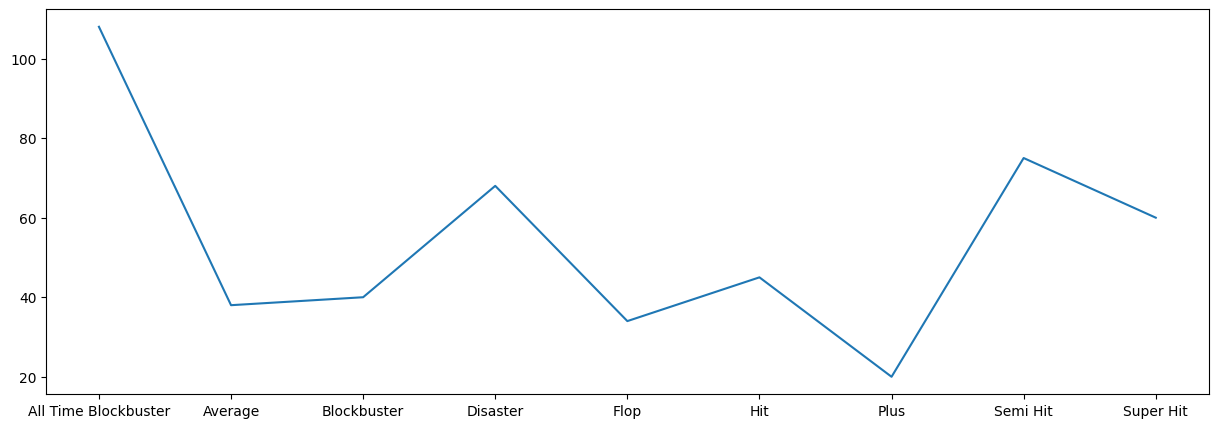

In [20]:
# METHOD 1
# creating a simple line plot with figure size (15,5)
plt.figure(figsize=(15,5)) # Setting figure size
plt.plot(df_budget['Box_Office_Verdict'],df_budget['Budget'])

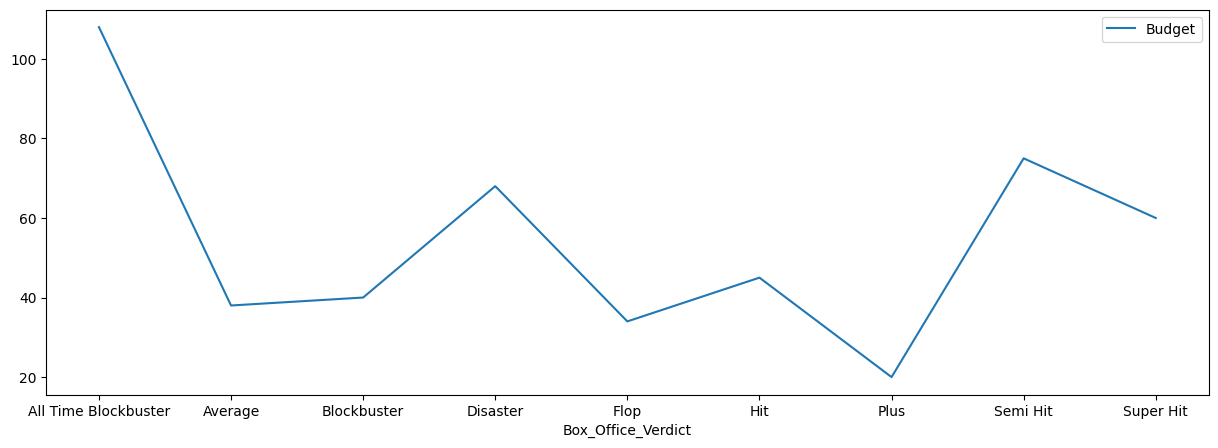

In [21]:
# METHOD 2
# creating a simple line plot with figure size (15,5)
lines = df_budget.plot.line(x='Box_Office_Verdict', y='Budget',figsize=(15,5))
# Note:- This method automatically create the legend for the plot

In [22]:
# Top 5 movies by BO_Collection , Using nlargest function of pandas
# Convert data type of BO_Collectio from object to float to int
# Convert data type of Budget from float to int
df['BO_Collection'] = df['BO_Collection'].astype(float)
df['BO_Collection'] = df['BO_Collection'].astype(int) 
df['Budget'] = df['Budget'].astype(int)
df_top_movies=df.nlargest(n=5, columns=['BO_Collection'])
df_top_movies = df_top_movies.set_index('Movie_Name')
df_top_movies

,BO_Collection,Budget,Box_Office_Verdict
Movie_Name,,,
PK,330,90,All Time Blockbuster
Bajrangi Bhaijaan,318,125,All Time Blockbuster
Tanu Weds Manu,148,40,Blockbuster
Baahubali (Hindi),111,130,Hit
ABCD 2,105,60,Super Hit


Customizing plot with markers linewidth and linestyle

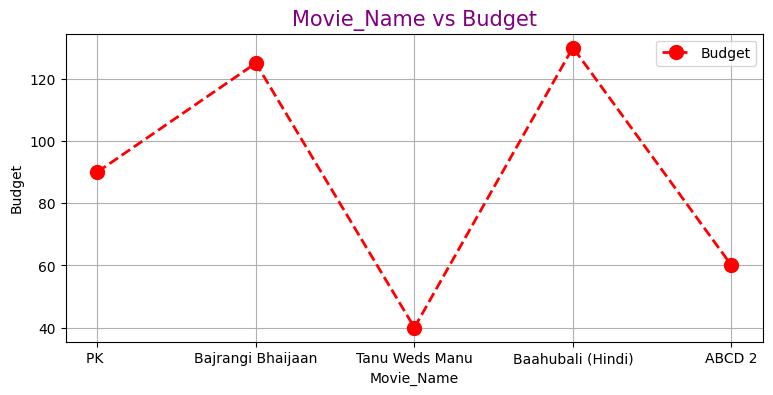

In [23]:
plt.figure(figsize=(9,4)) # setting plt figure
# Customizing plot by setting line color, marker, label, markersize, linewidth(lw) and linestyle
plt.plot(df_top_movies.index,df_top_movies['Budget'],color='red',marker='o',
         label='Budget',markersize=10,lw=2,linestyle='--')
plt.xlabel('Movie_Name') # Setting x-label
plt.ylabel('Budget') # Setting y-label
plt.legend() # Slowing Legend for the plot
# Setting title for the plot
plt.title('Movie_Name vs Budget',fontsize=15,color='purple') 
plt.grid() # Showing grid for the plot 
plt.show() # Showing the plot

Plotting multiple Line Plot in a single plot

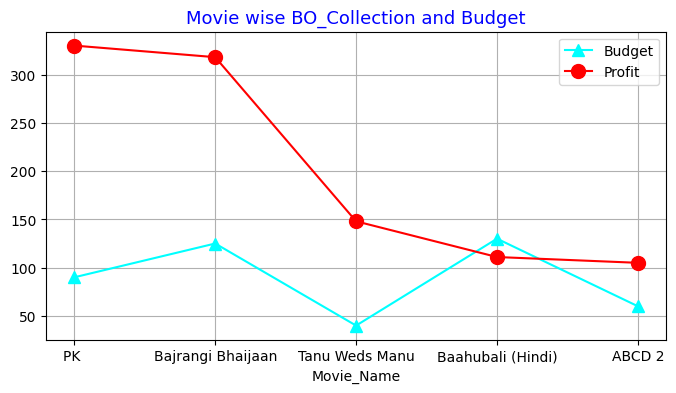

In [27]:
plt.figure(figsize=(8,4)) # setting plt figure
# Customizing first variable line with color, axis, width and position
plt.plot(df_top_movies.index,df_top_movies['Budget'],color='cyan',marker='^',label='Budget',markersize=8)
# Customizing second variable line with color, axis, width and position
plt.plot(df_top_movies.index,df_top_movies['BO_Collection'],color='red',marker='o',label='Profit',markersize=10)
# Setting title for the plot
plt.title('Movie wise BO_Collection and Budget',fontsize=13,color='Blue')
plt.xlabel('Movie_Name') # Setting x-label
plt.legend() # Showing Legend for the plot
plt.grid() # Showing grid for the plot 
plt.show() # Showing the plot

Plotting a normal Scatter plot

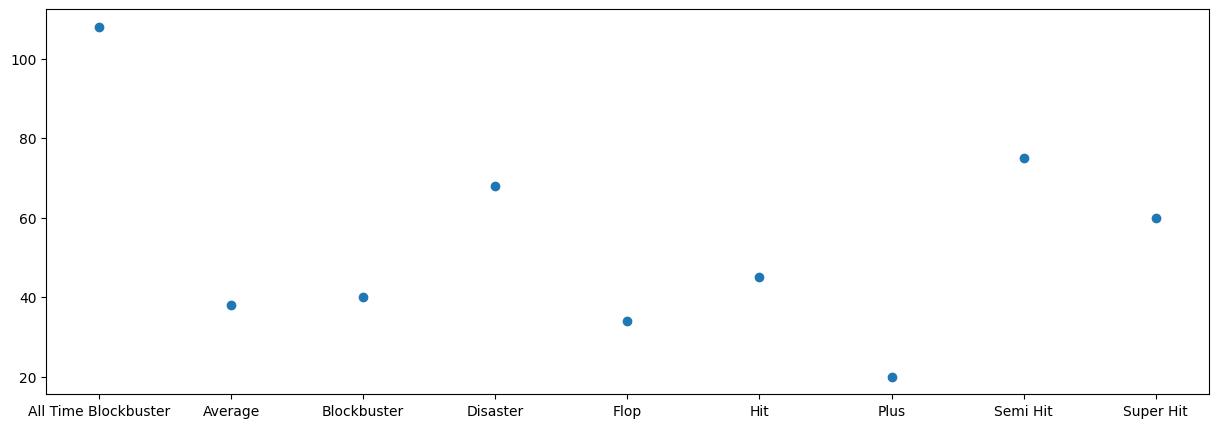

In [28]:
plt.figure(figsize=(15,5)) # setting plt figure
plt.scatter(df_budget['Box_Office_Verdict'],df_budget['Budget'])

Customizing plot with markers and grid

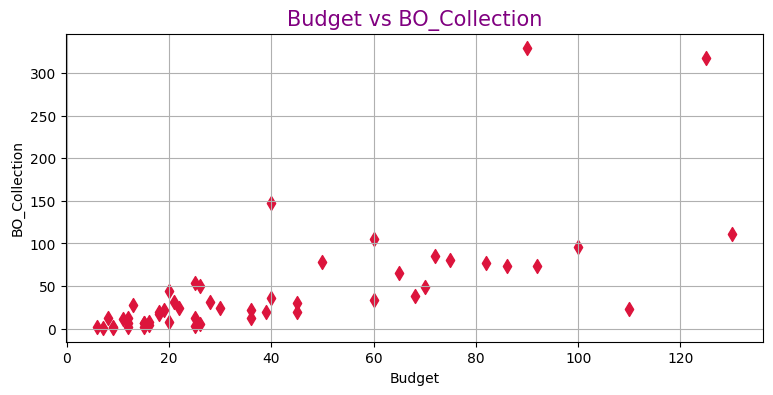

In [29]:
plt.figure(figsize=(9,4)) # setting plt figure
# Customizing plot by setting marker type, size and color
plt.scatter(df['Budget'],df['BO_Collection'],marker='d',s=50,color='crimson')
plt.xlabel('Budget') # Setting x-label
plt.ylabel('BO_Collection')  # Setting y-label
# Setting title for the plot
plt.title('Budget vs BO_Collection',fontsize=15,color='purple')
plt.grid() # Showing grid for the plot 
plt.show() # Showing the plot

In [30]:
# Making a new column 'Profit' by subtracting 'Budget'from 'BO_Collection'
df['Profit'] = df['BO_Collection']-df['Budget']
df.head()

,Movie_Name,BO_Collection,Budget,Box_Office_Verdict,Profit
0,Pyaar Ka Punchnama 2,53,25,Hit,28
1,Shandaar,38,68,Flop,-30
2,Singh is Bliing,74,92,Flop,-18
3,Jazbaa,24,30,Flop,-6
4,Talvar,24,22,Plus,2


Plotting two variables in single Plot with different markers customization

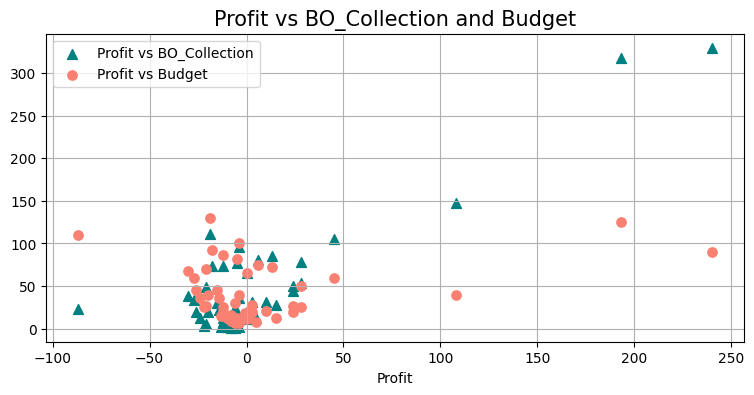

In [31]:
plt.figure(figsize=(9,4)) # setting plt figure
# Customizing first variable markers with type, size, color and label 
plt.scatter(df['Profit'],df['BO_Collection'],marker='^',s=50,color='teal',label='Profit vs BO_Collection')
# Customizing second variable markers with type, size, color and label 
plt.scatter(df['Profit'],df['Budget'],marker='o',s=45,color='salmon',label='Profit vs Budget')
plt.xlabel('Profit') # Setting x-label
# Setting title for the plot
plt.title('Profit vs BO_Collection and Budget',fontsize=15,color='black')
plt.grid() # Showing grid for the plot 
plt.legend() # Showing Legend for the plot
plt.show() # Showing the plot

Creating a simple Histogram

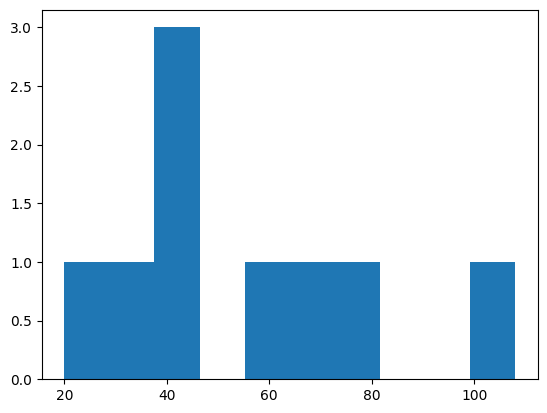

In [32]:
# Plotting a simple Histogram
plt.hist(df_budget['Budget'])
plt.show()# Showing the plot

In [34]:
# Top 5 movies by BO_Collection , Using nlargest function of pandas
# Convert data type of BO_Collectio from object to float to int
# Convert data type of Budget from float to int
df['BO_Collection'] = df['BO_Collection'].astype(float)
df['BO_Collection'] = df['BO_Collection'].astype(int) 
df['Budget'] = df['Budget'].astype(int)
df_top_movies=df.nlargest(n=5, columns=['BO_Collection'])
df_top_movies = df_top_movies.set_index('Movie_Name')
df_top_movies

,BO_Collection,Budget,Box_Office_Verdict,Profit
Movie_Name,,,,
PK,330,90,All Time Blockbuster,240
Bajrangi Bhaijaan,318,125,All Time Blockbuster,193
Tanu Weds Manu,148,40,Blockbuster,108
Baahubali (Hindi),111,130,Hit,-19
ABCD 2,105,60,Super Hit,45


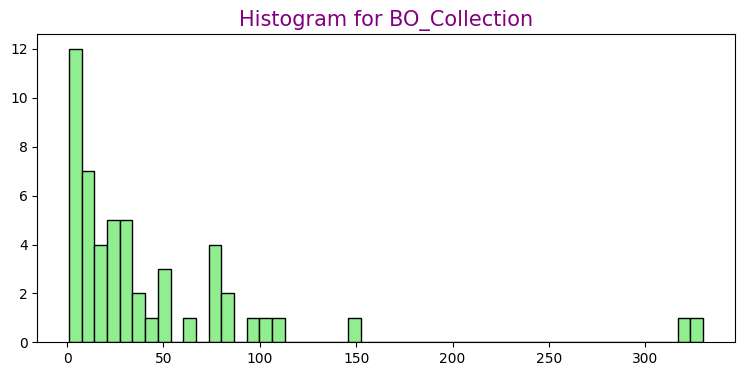

In [35]:
plt.figure(figsize=(9,4)) # setting plt figure
# Customizing plot with histogram color, edgecolor and bins
plt.hist(df['BO_Collection'],color='lightgreen',edgecolor='black',bins=50)
# Setting title for the plot
plt.title('Histogram for BO_Collection',fontsize=15,color='purple') 
plt.show() # Showing the plot

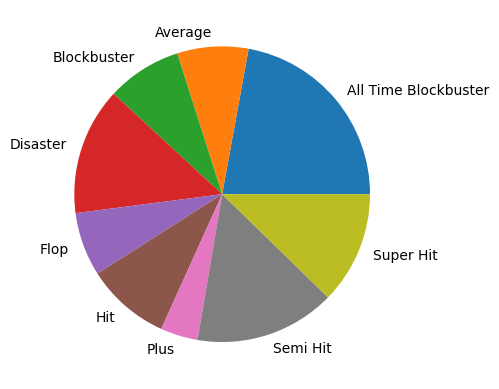

In [36]:
# Plotting a simple Pie Chart
plt.pie(x = df_budget['Budget'],labels=df_budget['Box_Office_Verdict'])
plt.show()# Showing the plot

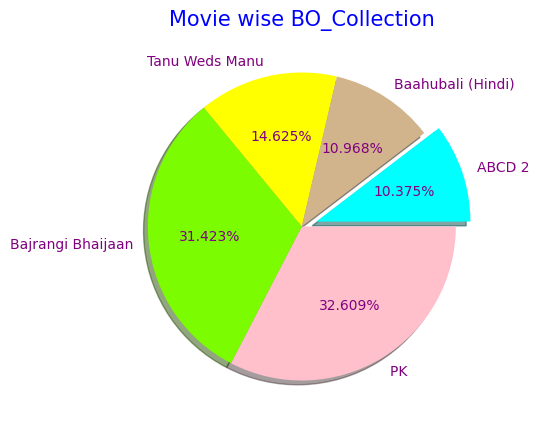

In [37]:
plt.figure(figsize=(5,5))  # setting plt figure
# Customizing plot by setting colors, autopact, explode, shadow, counterclock, textprops  properties
plt.pie(x = df_top_movies['BO_Collection'],labels=df_top_movies.index,
        colors=['pink','lawngreen','yellow','tan','cyan'],autopct='%.3f%%',
       explode=(0,0,0,0,0.1),shadow=True,counterclock=False,textprops=dict(color="Purple"))
# Setting title for the plot
plt.title('Movie wise BO_Collection',fontsize=15,color='blue')
plt.show() # Showing the plot

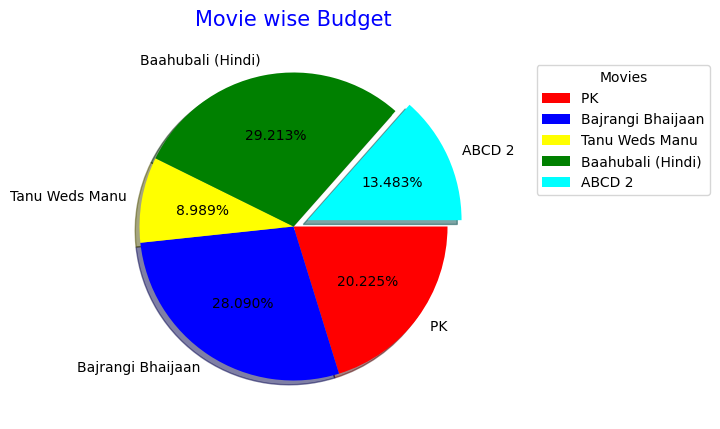

In [38]:
plt.figure(figsize=(5,5)) # setting plt figure
# Customizing plot by setting Label, colors, autopact, explode, shadow and counterclock properties
plt.pie(x = df_top_movies['Budget'],labels=df_top_movies.index,
        colors=['red','blue','yellow','green','cyan'],autopct='%.3f%%',
       explode=(0,0,0,0,0.1),shadow=True,counterclock=False)
# Setting title for the plot
plt.title('Movie wise Budget',fontsize=15,color='blue')
# Setting legend for the plot with Legend title, location and bbox_to_anchor properties
plt.legend(df_top_movies.index,  title="Movies",loc='right', bbox_to_anchor=(1, 1,0.6,-0.5))
plt.show() # Showing the plot

In [39]:
# Convert data type of BO_Collectio from object to float to int
# Convert data type of Budget from float to int
# Making a new column 'Profit' by subtracting 'Budget'from 'BO_Collection'
df['BO_Collection'] = df['BO_Collection'].astype(float)
df['BO_Collection'] = df['BO_Collection'].astype(int) 
df['Budget'] = df['Budget'].astype(int)
# Making a new column 'Profit' by subtracting 'Budget'from 'BO_Collection'
df['Profit'] = df['BO_Collection']-df['Budget']
df.head()

,Movie_Name,BO_Collection,Budget,Box_Office_Verdict,Profit
0,Pyaar Ka Punchnama 2,53,25,Hit,28
1,Shandaar,38,68,Flop,-30
2,Singh is Bliing,74,92,Flop,-18
3,Jazbaa,24,30,Flop,-6
4,Talvar,24,22,Plus,2


Plotting a simple Box PLot

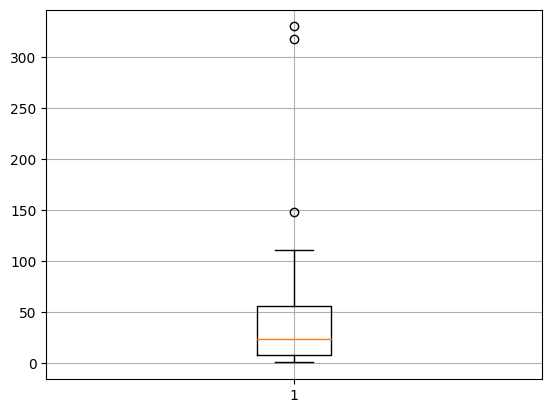

In [40]:
plt.boxplot(df['BO_Collection']) # Plot the box plot of BO_Collection
plt.grid() # Showing grid for the plot 
plt.show() # Showing the plot

From the Plot we can conclude  that <br>
- q1 - 8.00
- q2 - 23.50
- q3 - 56.00

In [ ]:
# Verifying the Output from the plot using describe() function.
df['BO_Collection'].describe()

count     52.000000
mean      45.673077
std       65.562938
min        1.000000
25%        8.000000
50%       23.500000
75%       56.000000
max      330.000000
Name: BO_Collection, dtype: float64

Customixing the Box Plot

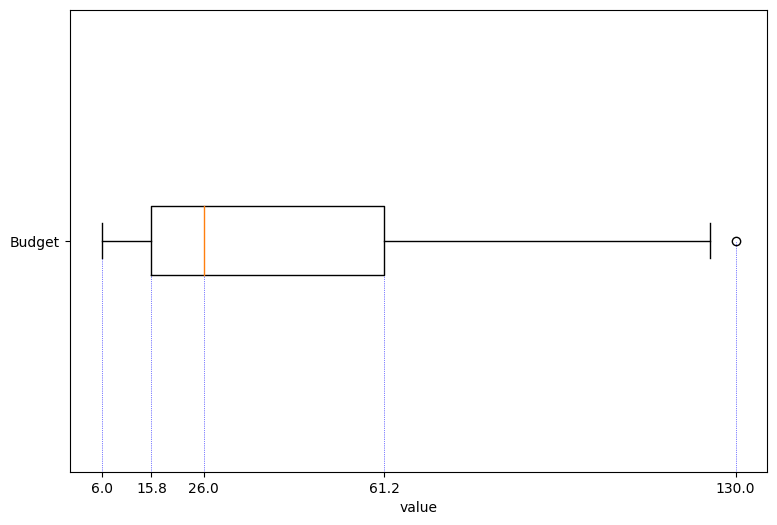

In [44]:
fig = plt.figure(1, figsize=(9, 6)) # setting plt figure and figuresize
ax = fig.add_subplot(111) # Setting plot axis
# Configuring box plot
# setting vert =  false, so as to make plot horizontal
# setting manage_ticks=True, so that the tick locations and labels will be adjusted to match the boxplot positions.
ax.boxplot(df['Budget'], vert=False, manage_ticks=True) 
ax.set_xlabel('value') # set X-label as value
ax.set_yticks([1]) # set Y-tick location 
ax.set_yticklabels(['Budget']) # set Y-tick label
# Calculate Quantiles for Budget column
quantiles = np.quantile(df['Budget'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
# Setting vlines to add vertical lines in data coordinates and configuring them.
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_ylim(0.5, 1.5) #Setting Y limit for box plot
ax.set_xticks(quantiles) # showing quantiles on X-axis
plt.show() # Showing the plot

In [46]:
# Verifying the Output from the plot using describe() function.
df['Budget'].describe()

count     52.000000
mean      40.673077
std       32.771174
min        6.000000
25%       15.750000
50%       26.000000
75%       61.250000
max      130.000000
Name: Budget, dtype: float64

Creating a stacked Bar Graph

In [47]:
df_top_movies=df.nlargest(n=5, columns=['BO_Collection'])
df_top_movies = df_top_movies.set_index('Movie_Name')
df_top_movies

,BO_Collection,Budget,Box_Office_Verdict,Profit
Movie_Name,,,,
PK,330,90,All Time Blockbuster,240
Bajrangi Bhaijaan,318,125,All Time Blockbuster,193
Tanu Weds Manu,148,40,Blockbuster,108
Baahubali (Hindi),111,130,Hit,-19
ABCD 2,105,60,Super Hit,45


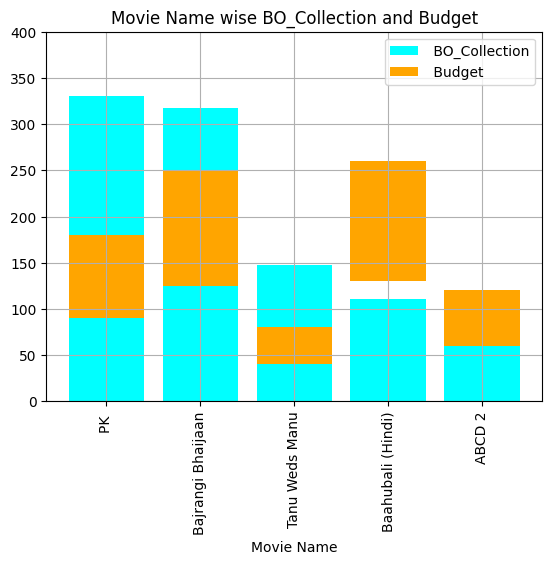

In [48]:
# Customizing first variable bars with color and label
plt.bar(df_top_movies.index,df_top_movies['BO_Collection'],color='cyan',label=' BO_Collection')
# Customizing second variable bars with color and label
plt.bar(df_top_movies.index,df_top_movies['Budget'],color='orange',label=' Budget',bottom=df_top_movies['Budget'])
plt.xlabel('Movie Name') # setting x-lable
plt.legend() # Showing legend for the plot
plt.title('Movie Name wise BO_Collection and Budget') # Setting title for the plot
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
plt.grid() # Showing grid for the plot 
plt.ylim(0,400) # Setting y limit for Y-axis
plt.show() # Showing the plot

In [49]:
budget_df= df_top_movies[['BO_Collection','Budget','Profit']]
budget_df

,BO_Collection,Budget,Profit
Movie_Name,,,
PK,330,90,240
Bajrangi Bhaijaan,318,125,193
Tanu Weds Manu,148,40,108
Baahubali (Hindi),111,130,-19
ABCD 2,105,60,45


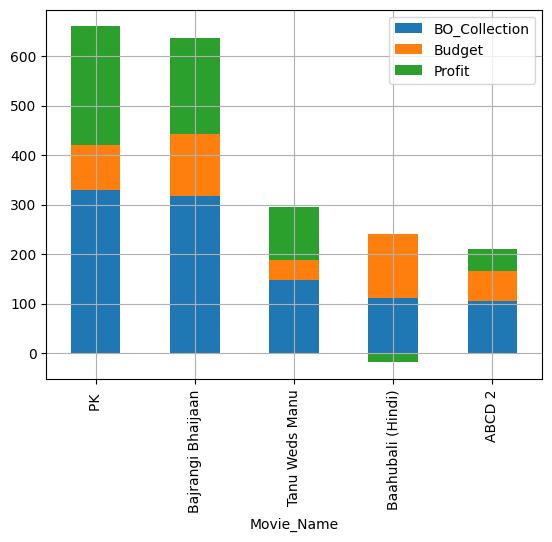

In [50]:
budget_df.plot(kind='bar',stacked=True) # Plotting a stack bar graph using plot() function
plt.grid() # Showing grid for the plot 
plt.show() # Showing the plot

Creating a Stacked Area Chart

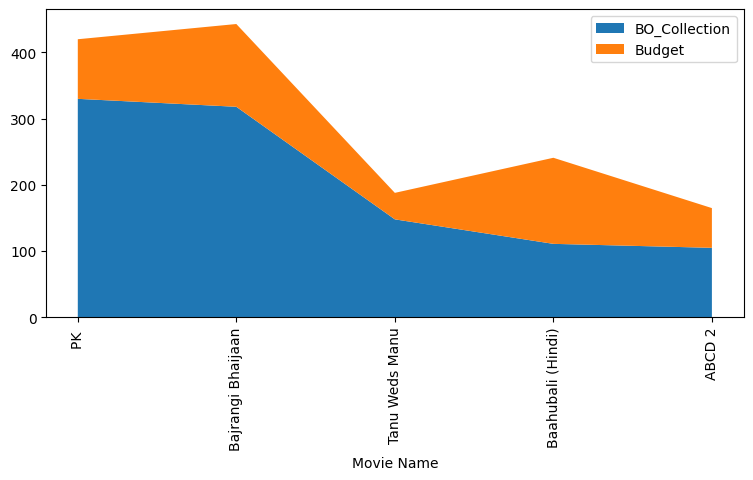

In [51]:
plt.figure(figsize=(9,4)) # setting plot figure size
# Configuring Stacked Area chart for two variables
plt.stackplot(budget_df.index,budget_df['BO_Collection'],budget_df['Budget'], labels=['BO_Collection','Budget'])
plt.xlabel('Movie Name') # setting x-lable
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
plt.legend() # Showing legend for the plot
plt.show() # Showing the plot

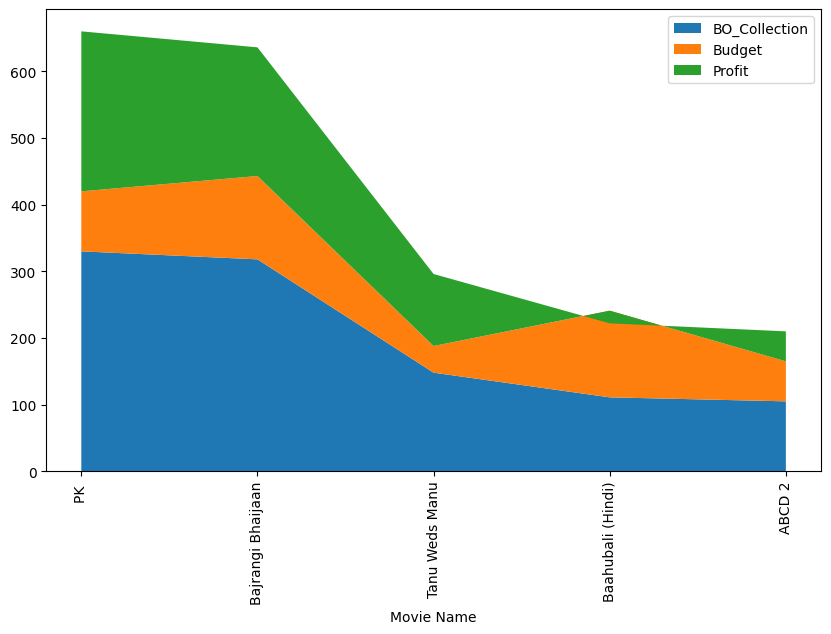

In [52]:
plt.figure(figsize=(10,6)) # setting plot figure size
# Configuring Stacked Area chart for three variables
plt.stackplot(budget_df.index,budget_df['BO_Collection'],budget_df['Budget'],budget_df['Profit'], 
              labels=['BO_Collection','Budget','Profit'])
plt.xlabel('Movie Name') # setting x-lable
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
plt.legend() # Showing legend for the plot
plt.show() # Showing the plot

Plotting a simple Box PLot

In [53]:
df_top_movies=df.nlargest(n=5, columns=['BO_Collection'])
df_top_movies = df_top_movies.set_index('Movie_Name')
df_top_movies

,BO_Collection,Budget,Box_Office_Verdict,Profit
Movie_Name,,,,
PK,330,90,All Time Blockbuster,240
Bajrangi Bhaijaan,318,125,All Time Blockbuster,193
Tanu Weds Manu,148,40,Blockbuster,108
Baahubali (Hindi),111,130,Hit,-19
ABCD 2,105,60,Super Hit,45


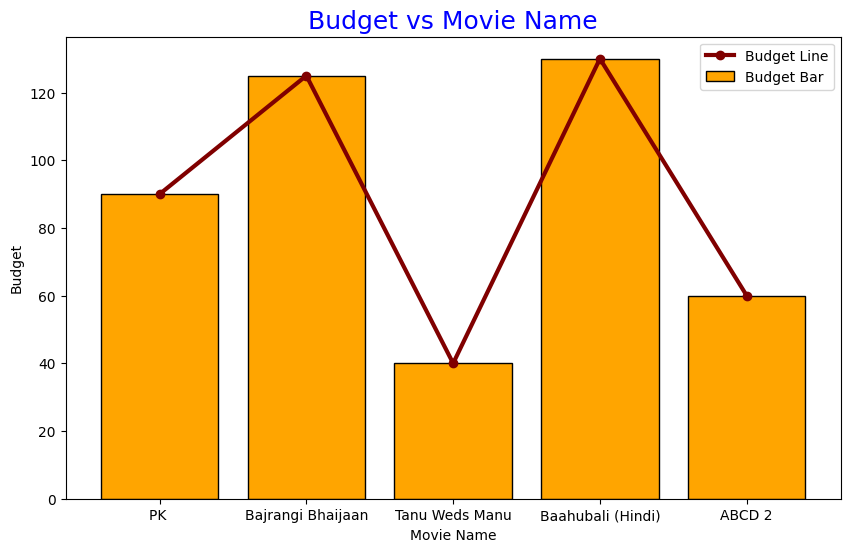

In [54]:
plt.figure(figsize=(10,6)) # setting plot figure size
# Customizing first variable for bar plot  with color and edgecolor
plt.bar(df_top_movies.index,df_top_movies['Budget'],color='orange',edgecolor='black',label='Budget Bar')
# Customizing second variable for line plot  with color and linewidth and marker
plt.plot(df_top_movies.index,df_top_movies['Budget'],color='maroon',lw=3,marker='o',label='Budget Line')
plt.xlabel('Movie Name')  # set X-label as Movie Name
plt.ylabel('Budget')  # set X-label as Budget
plt.legend() # Setting legend for the plot 
plt.title('Budget vs Movie Name',fontsize=18,color='blue') # Setting title for the plot
plt.show() # Showing the plot

Plotting Multiple Plot using Subplots

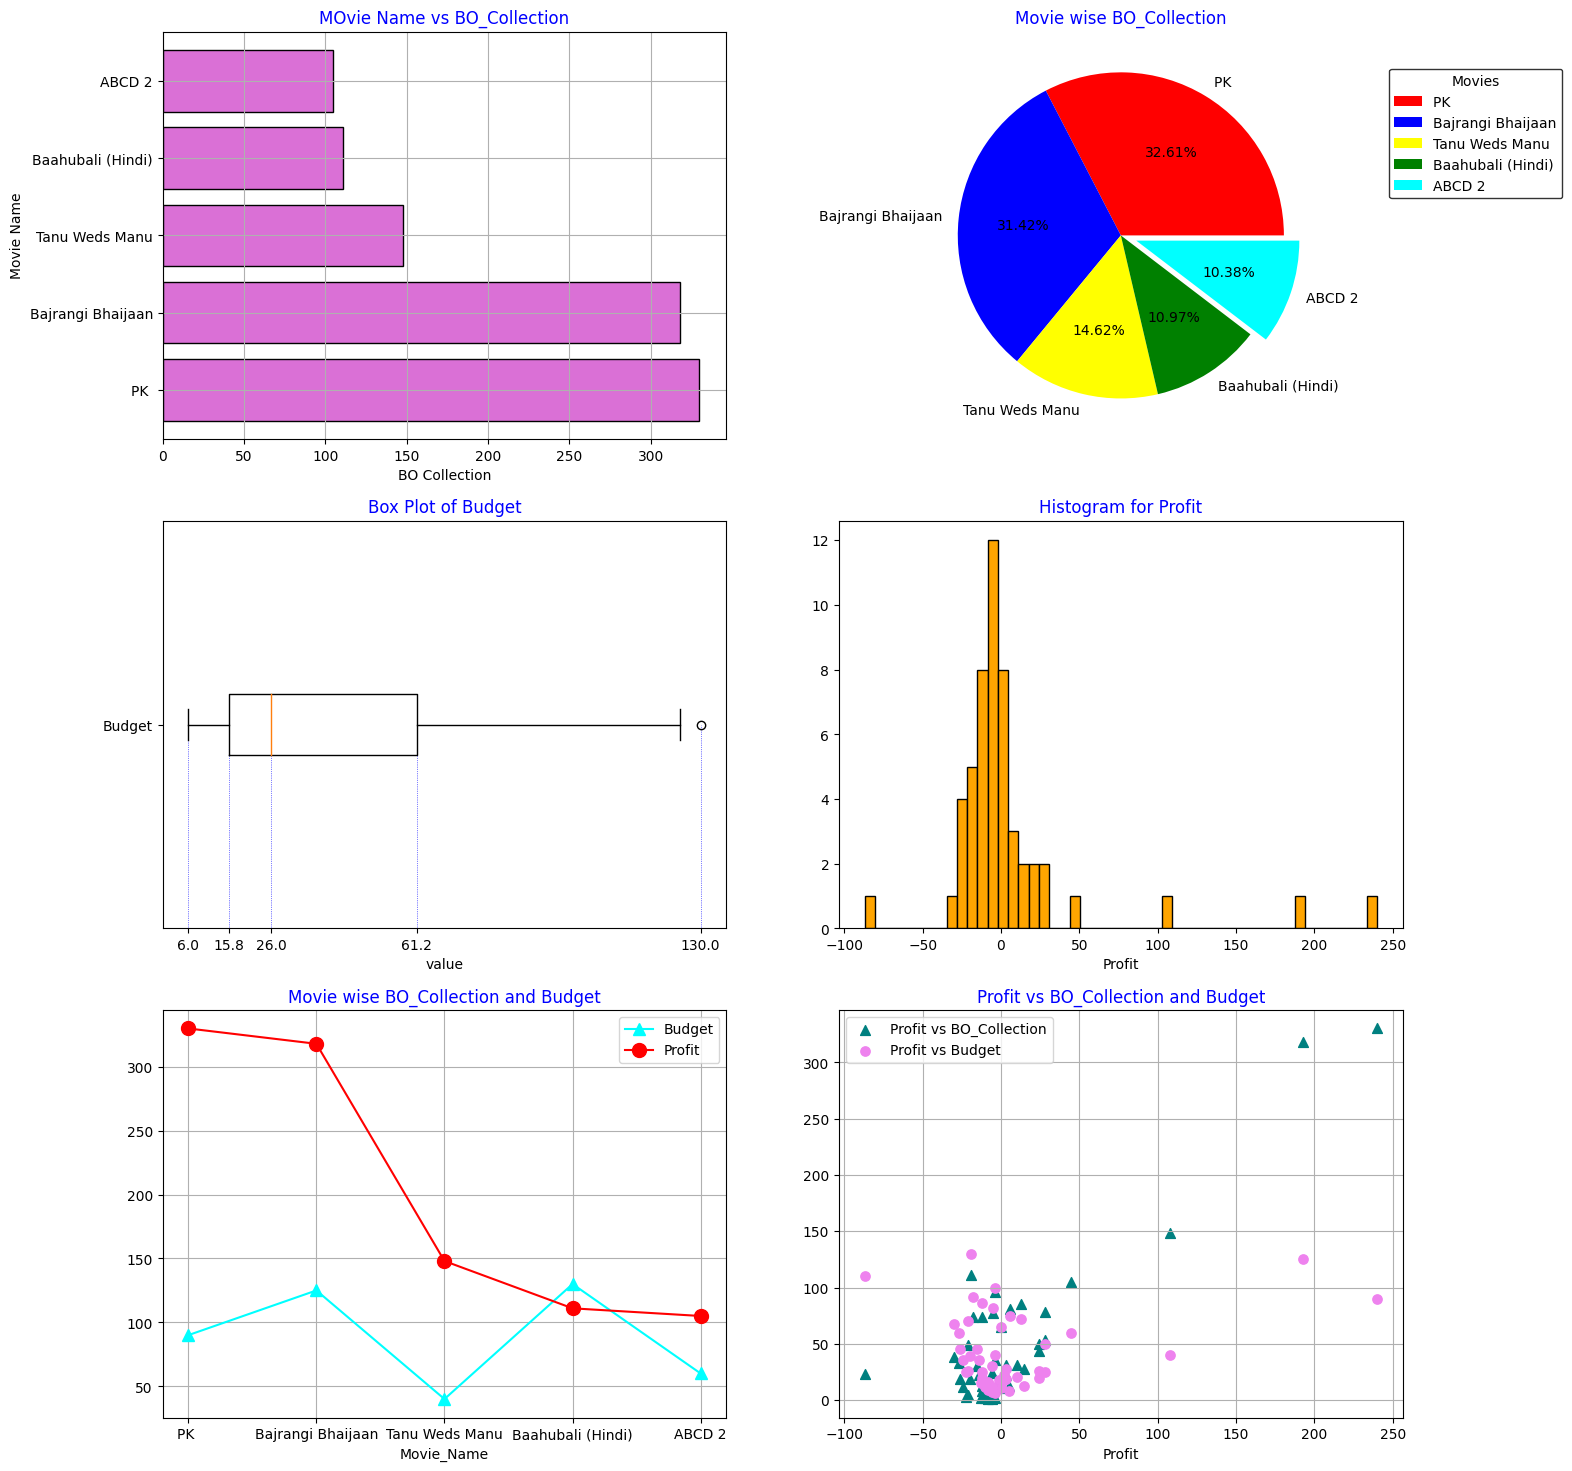

In [55]:
# Plotting Multiple Plot using Subplots() function
# Plotting 6 plots in a single plot having 3 rows and 2 columns 
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(16,18))  # nrows=3,ncols=2
# ax1 is row1,col1, ax2 is row1,col2
# ax3 is row2,col1, ax4 is row2,col2
# ax5 is row3,col1, ax6 is row3,col2

# ax1 is row1,col1
# Making horizontal bar graph using barh() function and customizing it with color and edgecolor
ax1.barh(df_top_movies.index,df_top_movies['BO_Collection'],color='orchid',edgecolor='black')
ax1.set_xlabel('BO Collection') # set X-label as value
ax1.set_ylabel('Movie Name') # set Y-label as value
# Setting title for the plot
ax1.set_title('MOvie Name vs BO_Collection',fontsize=12,color='blue') 
ax1.grid() # Showing grid for the plot 

# ax2 is row1,
# Making a pie plot of 'Movie wise BO_Collection' and customizing it
# Customizing plot by setting Label, colors, autopact, explode, shadow and counterclock properties
ax2.pie(x = df_top_movies['BO_Collection'],labels=df_top_movies.index,
        colors=['red','blue','yellow','green','cyan'],autopct='%.2f%%',
       explode=(0,0,0,0,0.1))
# Setting title for the plot
ax2.set_title('Movie wise BO_Collection',fontsize=12,color='blue')
# Setting legend for the plot with Legend title, location and bbox_to_anchor properties
ax2.legend(df_top_movies.index,  title="Movies",loc='right', bbox_to_anchor=(1, 1,0.6,-0.5),edgecolor='black')

# ax3 is row2,col1
# Configuring box plot
# setting vert =  false, so as to make plot horizontal
# setting manage_ticks=True, so that the tick locations and labels will be adjusted to match the boxplot positions.
ax3.boxplot(df['Budget'], vert=False, manage_ticks=True) 
ax3.set_xlabel('value') # set X-label as value
ax3.set_yticks([1]) # set Y-tick location 
ax3.set_yticklabels(['Budget']) # set Y-tick label
# Calculate Quantiles for Budget column
quantiles = np.quantile(df['Budget'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
# Setting vlines to add vertical lines in data coordinates and configuring them.
ax3.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax3.set_ylim(0.5, 1.5) #Setting Y limit for box plot
ax3.set_xticks(quantiles) # showing quantiles on X-axis
# Setting title for the plot
ax3.set_title('Box Plot of Budget',fontsize=12,color='blue')

# ax4 is row2,col2
# Making a Histogram fro Profit
ax4.hist(df['Profit'],color='orange',edgecolor='black',bins=50)
ax4.set_title('Histogram for Profit',fontsize=12,color='blue')
ax4.set_xlabel('Profit') # Setting x-label

# ax5 is row3,col1
# Making multiple line plot in single plot
# Customizing first variable line with color, axis, width and position
ax5.plot(df_top_movies.index,df_top_movies['Budget'],color='cyan',marker='^',label='Budget',markersize=8)
# Customizing second variable line with color, axis, width and position
ax5.plot(df_top_movies.index,df_top_movies['BO_Collection'],color='red',marker='o',label='Profit',markersize=10)
# Setting title for the plot
ax5.set_title('Movie wise BO_Collection and Budget',fontsize=12,color='blue')
ax5.set_xlabel('Movie_Name') # Setting x-label
ax5.legend() # Showing Legend for the plot
ax5.grid() # Showing grid for the plot 


# ax6 is row3,col2
# Making multiple scatter plot in a single plot
# Customizing first variable markers with type, size, color and label 
ax6.scatter(df['Profit'],df['BO_Collection'],marker='^',s=50,color='teal',label='Profit vs BO_Collection')
# Customizing second variable markers with type, size, color and label 
ax6.scatter(df['Profit'],df['Budget'],marker='o',s=45,color='violet',label='Profit vs Budget')
ax6.set_xlabel('Profit') # Setting x-label
# Setting title for the plot
ax6.set_title('Profit vs BO_Collection and Budget',fontsize=12,color='blue')
ax6.grid() # Showing grid for the plot 
ax6.legend() # Showing Legend for the plot

plt.show() # Showing the plot

Creating  3D Plots

In [56]:
from mpl_toolkits.mplot3d import Axes3D

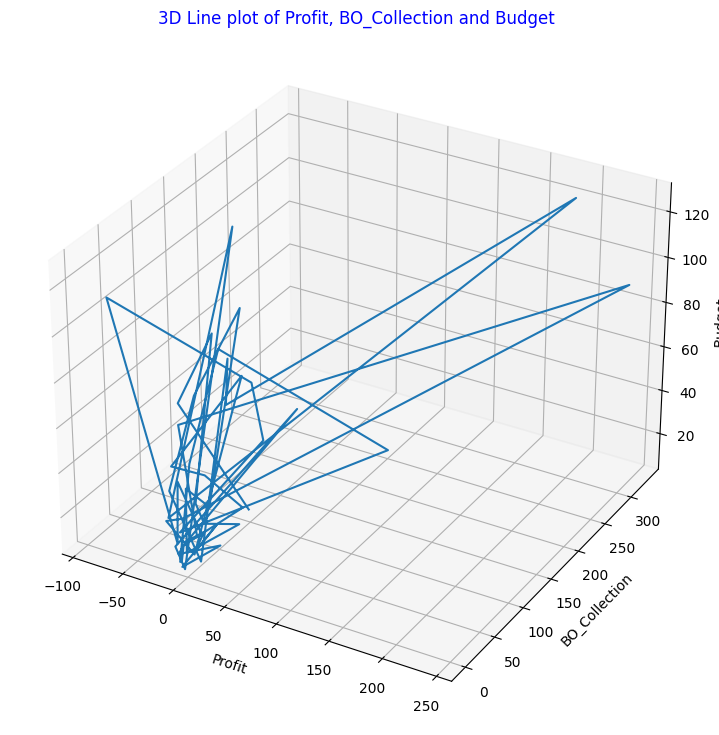

In [57]:
# Plotting 3D Line Plot
fig = plt.figure(figsize=(12,9)) # setting plt figuresize
ax = fig.add_subplot(projection='3d') # Defining Projection as '3d'
# Defining X,Y and Z axis for the plot and plot type as line by using plot() function
ax.plot(df['Profit'], df['BO_Collection'], df['Budget'])
ax.set_xlabel('Profit') # Setting x-label
ax.set_ylabel('BO_Collection') # Setting y-label
ax.set_zlabel('Budget') # Setting z-label
# Setting title for the plot
ax.set_title('3D Line plot of Profit, BO_Collection and Budget',fontsize=12,color='blue')
plt.show() # Showing the plot

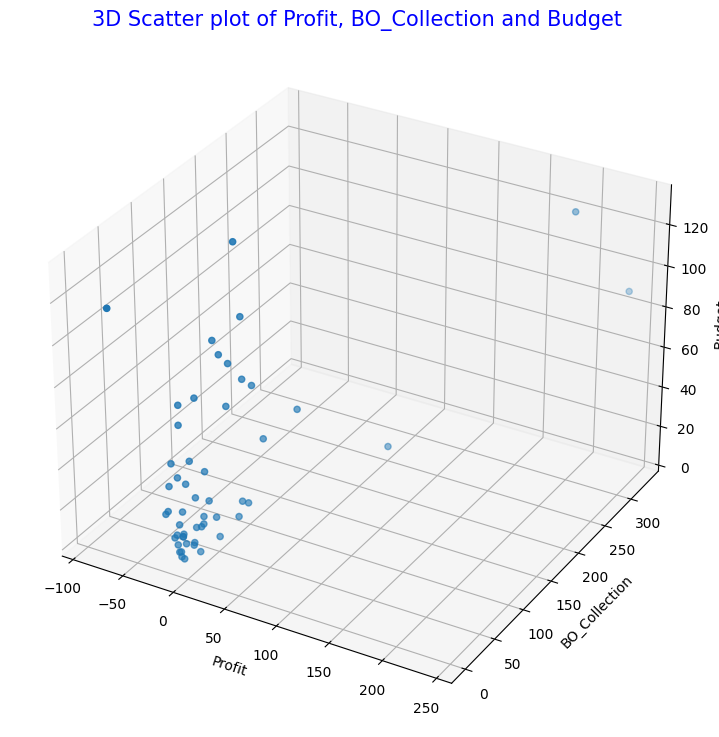

In [58]:
# Plotting 3D Scatter Plot
fig = plt.figure(figsize=(12,9)) # setting plt figuresize
ax = fig.add_subplot(projection='3d') # Defining Projection as '3d'
# Defining X,Y and Z axis for the plot and plot type as line by using plot() function
ax.scatter(df['Profit'], df['BO_Collection'], df['Budget'])
ax.set_xlabel('Profit') # Setting x-label
ax.set_ylabel('BO_Collection') # Setting y-label
ax.set_zlabel('Budget') # Setting z-label
# Setting title for the plot
ax.set_title('3D Scatter plot of Profit, BO_Collection and Budget',fontsize=15,color='blue')
plt.show() # Showing the plot

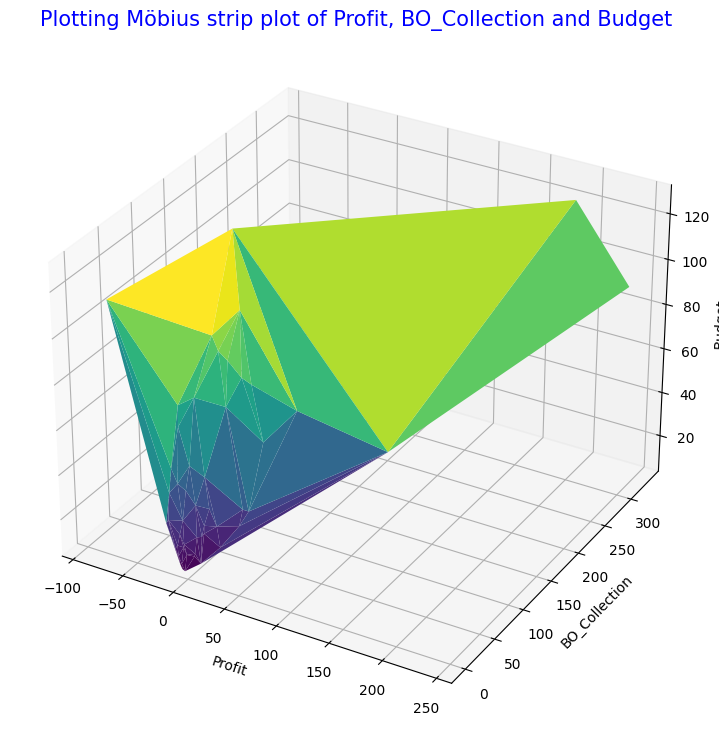

In [59]:
# Plotting Möbius strip
fig = plt.figure(figsize=(12,9)) # setting plt figuresize
ax = fig.add_subplot(projection='3d') # Defining Projection as '3d'
# Defining X,Y and Z axis for the plot and plot type as 'plot_trisurf' by using plot_trisurf() function 
# Customizing the plot with color using cmap and setting line width as 0.5
ax.plot_trisurf(df['Profit'], df['BO_Collection'], df['Budget'],cmap ='viridis', linewidths = 0.5)
ax.set_xlabel('Profit') # Setting x-label
ax.set_ylabel('BO_Collection') # Setting y-label
ax.set_zlabel('Budget') # Setting z-label
# Setting title for the plot
ax.set_title('Plotting Möbius strip plot of Profit, BO_Collection and Budget',fontsize=15,color='blue')
plt.show() # Showing the plot